# MNIST NEURAL NETWORK DIGIT PREDICTION MODEL

The MNIST digit prediction system is a classic example of a machine learning task, specifically image classification. MNIST stands for the **"Modified National Institute of Standards and Technology"** dataset, and it is a widely used benchmark in the field of computer vision and machine learning. The goal of this system is to correctly classify handwritten digits (0-9) from images.

**Dataset:**

MNIST consists of a training set of 60,000 grayscale images of handwritten digits (0-9) and a test set of 10,000 such images.
Each image is a 28x28 pixel grid, resulting in 784 total pixels.
The dataset is preprocessed to normalize pixel values, making them fall in the range [0, 1].


**Problem Statement:**

The goal is to train a machine learning model to recognize and classify these handwritten digits correctly.

### Importing Libraries:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2                                      # opencv
from PIL import Image                           # pillow
import tensorflow as tf
tf.random.set_seed(3)                           # setting seed value to get identical results each time
from tensorflow import keras
from keras.datasets import mnist                # importing the MNIST dataset which is present in keras itself
from tensorflow.math import confusion_matrix

%matplotlib inline

In [10]:
# THIS DATASET IS PREPROCESSED AND RETURNS x_TRAIN, Y_TRAIN, X_TEST AND Y_TEST.
# Meaning the image is already resized, converted to greyscale and converted into numpy array for computation
# So the image processing and train_test_split is already done for us.

### Now we load the MNIST data from keras.datasets

In [12]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()
# by running this we get four arrays: X_TRAIN, Y_TRAIN, X_TEST AND Y_TEST.

In [13]:
# we can check the data type and confirm that it is indeed numpy n dimensional array
type(X_train)

numpy.ndarray

In [19]:
# Finding the shape of the numpy arrays
# the size (60000, 28, 28) associated with X_train implies that our X_train contains 60k images 
# and each image is of 28x28 pixels.

# since we dont have a 3 in (60000, 28, 28) after 28, we can conclude that the image in 
# indeed a greyscale image otherwise the dimensions would have been: (60000, 28, 28, 3).

# the image converted to numpy array will be stored in the X_train and the label of the image will be stored in Y_train.

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Printing a sample image to see how numpy array stores the it.

In [20]:
# Printing the 786th image

print(X_train[786])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  74 157 242 215  47
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  28 101 236 254 242 20

In [22]:
print(X_train[786].shape)

(28, 28)


### Displaying the image.

7


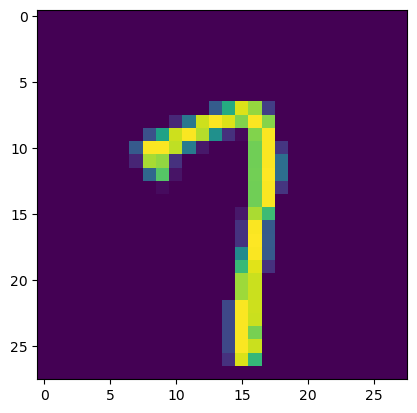

In [25]:
# Displaying the image
plt.imshow(X_train[786])

# Printing the corresponding label
print(Y_train[786])

In [26]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [28]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [29]:
# normalising the values between 0 and 1 for easier computation:

X_train = X_train/255
X_test = X_test/255

In [31]:
# checking the affected image:

# Printing the 786th image

print(X_train[786])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Building the Neural Network

In [35]:
# setting up the layers of the neural network
# we cannot take input image as 28x28 matrices so we use flatten to process them in a single line

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [36]:
# compiling the Neural Network
# the purpose of the optimiser is to determine the most optimum parameter.


model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2967 - accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1378 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1030 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0833 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0697 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9845
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9860
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

In [39]:
# loss funtion is basically the distance between your true value and predicted value, 
# notice how the loss function reduces with each epoch, final accuracy of the model is 98.85%

### Model Evaluation

In [40]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9754
0.9753999710083008


In [42]:
# we have more than 97% accuracy on test data which is pretty cool!

In [43]:
print(X_test.shape)

(10000, 28, 28)


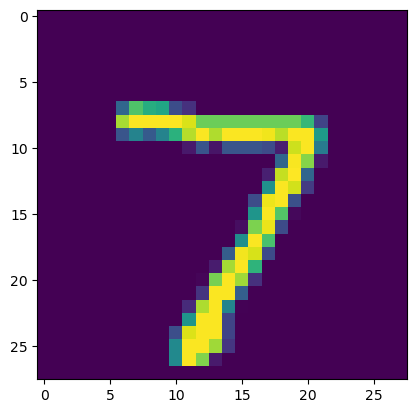

In [45]:
# first data point in X_test
plt.imshow(X_test[0])

In [46]:
print(Y_test[0])

7


In [47]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [48]:
print(Y_pred.shape)

(10000, 10)


In [56]:
print(Y_pred[0])

# these are prediction probabilities:
# remember the shape is 10 and each digit from 0-9 is represented in this probability
# so by analysing the output below we can conclude that the predicted value is 7 
# because the 7th position hold the highest probability: 9.9999303e-01.

[7.5652704e-02 3.7568591e-03 2.1927077e-02 6.7272699e-01 4.1055024e-05
 3.7891603e-01 5.4561746e-09 9.9999303e-01 6.0998905e-01 4.7370014e-01]


In [50]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [51]:
# model.predict() gives the prediction probability of each class for that data point

In [57]:
# converting the prediction probabilities to class label
# here the argmax is taking the Y_pred and returning the number with the highest probability.

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [58]:
# similarly we can convert the prediction probabilities to class label for all test data points using argmax!

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [54]:
# Y_test --> True labels

# Y_pred_labels --> Predicted Labels

### building the confusion matrix

In [59]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [60]:
print(conf_mat)

tf.Tensor(
[[ 969    0    0    3    0    1    4    1    2    0]
 [   0 1126    2    0    0    1    2    1    3    0]
 [   3    0 1005    3    4    0    2    9    4    2]
 [   0    0    4  968    1   12    0    7    9    9]
 [   0    0    3    1  969    1    2    0    0    6]
 [   2    0    0   13    1  869    1    1    2    3]
 [   3    3    1    1    3    7  939    0    1    0]
 [   1    3    9    1    3    0    0 1002    1    8]
 [   5    0    1    6    5    7    2    4  940    4]
 [   3    2    0    4   22    7    2    4    2  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

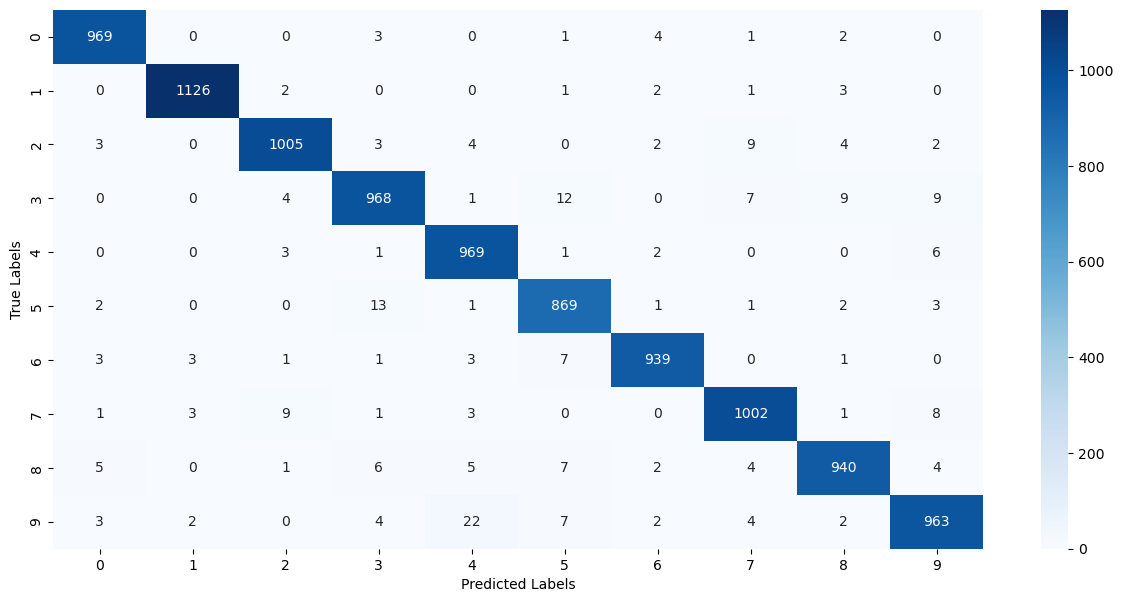

In [62]:
# building the heatmap

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [63]:
# the above confusion matrix represents the number of correct predictions to true labels

### Building the predicting system

In [206]:
# reading the handpainted image from the desktop which i created using MS paint lol

input_image_path = "C:\\Users\\avina\\OneDrive\\Desktop\\cool3.png"

input_image = cv2.imread(input_image_path)

In [207]:
type(input_image)

# we can see that the image has been successfully been converted to a numpy array!

numpy.ndarray

In [208]:
# our converted numpy array:

print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


(-0.5, 251.5, 251.5, -0.5)

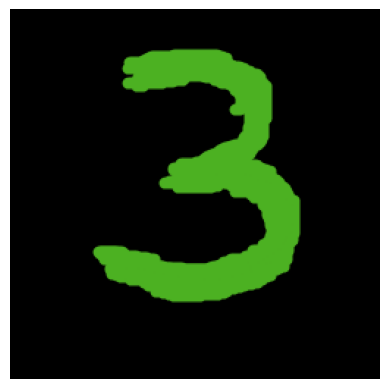

In [209]:
# Display the image using matplotlib
plt.imshow(input_image)
plt.axis('off')  # Turn off axis labels

In [210]:
# finding the image dimensions and confirming that the image is not of the given default shape: 28x28
input_image.shape

(252, 252, 3)

In [211]:
# converting the image to greyscale:

greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [212]:
# since the image shape is no longer: (648, 1152, 3)
# since we no longer have 3 which stands for RGB
# we can conclude that the image has been converted to greyscale image!

greyscale.shape

(252, 252)

In [231]:
# here we resize the image, we resize the "geyscale" image into the 28x28 dimensions!

input_image_resize = cv2.resize(greyscale, (28, 28))

In [214]:
# successfully resized!

input_image_resize.shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

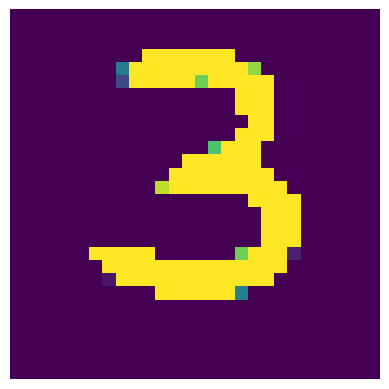

In [228]:
# Display the image using matplotlib
plt.imshow(input_image_resize)
plt.axis('off')  # Turn off axis labels

In [216]:
# we can see that the dimensions have been successfully been converted to 28x28 pixels
# now we need to convert this image to 0s and 1s, normalisation.

In [217]:
input_image_resize = input_image_resize/255

In [218]:
type(input_image_resize)

numpy.ndarray

In [219]:
# [1,28,28] means that we are predicting the value for only 1 image whos dimensions are 28x28

image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [220]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

# this below are the prediction probabilities:

1/1 [==============================] - 0s 20ms/step
[[7.7559035e-03 4.6948284e-02 9.1884768e-01 9.9997658e-01 9.2394439e-05
  9.9744213e-01 2.2511779e-04 5.1075843e-04 9.0689456e-01 5.5977893e-01]]


In [221]:
# now we take the highest probability and conclude the prediction:

input_pred_label = np.argmax(input_prediction)

In [222]:
print(input_pred_label)

3


In [223]:
# as we can see above, the predicted label is indeed 3!

In [225]:
# Now, we can combine everything we did earlier to create the final neural network digit prediction system

## Final Digit Prediction System using Deep Learning:

Path of the image to be predicted:  C:\\Users\\avina\\OneDrive\\Desktop\\cool5.png
1/1 [==============================] - 0s 18ms/step
The Handwritten Digit is recognised as:   5


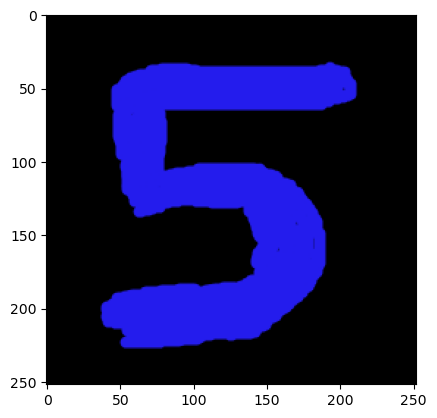

In [233]:
# INPUT THE IMAGE PATH:
input_image_path = input("Path of the image to be predicted:  ")


# READS THE IMAGE AND CONVERTS IT INTO NUMPY ARRAY:
input_image = cv2.imread(input_image_path)


# DISPLAYS THE IMAGE:
plt.imshow(input_image)


# CONVERTS THE IMAGE INTO GREYSCALE:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)


# RESIZES THE IMAGE INTO 28X28 PIXELS:
input_image_resize = cv2.resize(grayscale, (28, 28))


# NORMALIZES THE VALUES:
input_image_resize = input_image_resize/255


# RESHAPES THE IMAGE INTO 28x28:
image_reshaped = np.reshape(input_image_resize, [1,28,28])


# PREDICTS THE PROOBABILITY VALUES OF EVERY NUMBER FROM 0-9:
input_prediction = model.predict(image_reshaped)


# TAKES THE MAX OF THE PROBABILITIES AND STORES IT:
input_pred_label = np.argmax(input_prediction)


# PRINTS THE FINAL PREDICTED LABEL:
print("The Handwritten Digit is recognised as:  ", input_pred_label)